In [1]:
from PIL import Image
from pytesseract import *
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
filename = "img/image02.png"
image = Image.open(filename)
custom_oem_psm_config = r'--oem 1 --psm 3'
coord = image_to_data(image, lang = 'kor', config=custom_oem_psm_config, output_type = Output.DICT)
n_box = len(coord['level'])

TesseractError: (1, 'Error opening data file /usr/share/tesseract-ocr/4.00/tessdata/kor.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'kor\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

In [453]:
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

In [454]:
ret, thr1 = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
thr1 = cv2.cvtColor(thr1, cv2.COLOR_BGR2RGB)
thr1_pil = Image.fromarray(thr1)
coord = image_to_data(thr1_pil, lang = 'kor', config=custom_oem_psm_config, output_type = Output.DICT)
n_box = len(coord['level'])

In [266]:
for i in range(n_box):
    if coord['text'][i] != "":
#        if coord['width'][i] <= 200:
#            if coord['height'][i] <= 50:
                (x, y, w, h) = (coord['left'][i], coord['top'][i], coord['width'][i], coord['height'][i])
                cv2.rectangle(thr1, (x, y), (x + w, y + h), (255, 0, 0), 1)

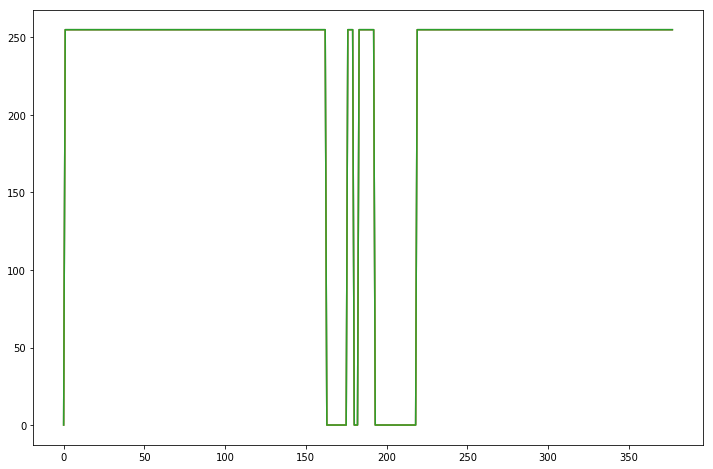

In [384]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
idx = [i for i in range(img.shape[1])]
#row = thr1[30, :]
row = thr1[30, : ]
plt.plot(idx, list(row))
plt.show()

In [385]:
row_mean = list()
for row in thr1:
    row_mean.append(np.mean(row))

In [386]:
idx = [i for i in range(len(row_mean))]
row_mean_dict = dict(zip(idx, row_mean))

In [387]:
sel_row = {i: v for i, v in row_mean_dict.items() if ((v >= 200) & (v <= 252))}

In [455]:
thr1.shape

(600, 378, 3)

In [389]:
sel_row.keys()

dict_keys([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 165, 169, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 224, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 278, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 388, 389, 390, 391, 392, 393, 394, 395, 396, 

In [456]:
subimg = thr1[289:427, 0:377]

In [366]:
subimg.shape

(138, 377, 3)

In [399]:
col_mean_list = list()
col_idx = [i for i in range(subimg.shape[1])]
for i in col_idx:
    col = subimg[:, i , :]
    col_mean = np.mean(col)
    col_mean_list.append(col_mean)
    
col_mean_dict = dict(zip(col_idx, col_mean_list))
sel_col_dict = {i: v for i, v in col_mean_dict.items() if ((v >= 200) & (v <= 240))}
sel_col_dict.keys()

dict_keys([84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 115, 116, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 142, 143, 144, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 174, 175, 176, 177, 181, 182, 217, 255, 256, 267, 268, 271, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 296, 297, 298, 299, 308, 309, 310, 311, 312, 313, 314, 315, 320, 324, 325, 326, 327, 330, 331, 332, 333, 334, 335, 336, 339])

In [499]:
subimg1 = subimg[0:137, 82:186]

In [492]:
subimg1.shape

(137, 102, 3)

In [500]:
subimg2 = subimg1[28:55, 0:104]

In [365]:
sel_col.keys()

dict_keys([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 45, 46, 47, 48, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 78, 79, 80, 81, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 113, 114, 119, 120, 121, 123, 124, 125, 126, 132, 133, 134, 135])

In [340]:
coord = image_to_data(subimg, lang = 'kor', config=custom_oem_psm_config, output_type = Output.DICT)
n_box = len(coord['level'])

In [341]:
for i in range(n_box):
    if coord['text'][i] != "":
#        if coord['width'][i] <= 200:
#            if coord['height'][i] <= 50:
                (x, y, w, h) = (coord['left'][i], coord['top'][i], coord['width'][i], coord['height'][i])
                cv2.rectangle(subimg, (x, y), (x + w, y + h), (0, 0,255), 1)

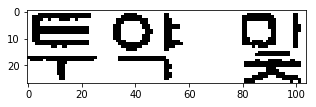

In [501]:
plt.figure(figsize=(5, 5))
plt.imshow(subimg2)

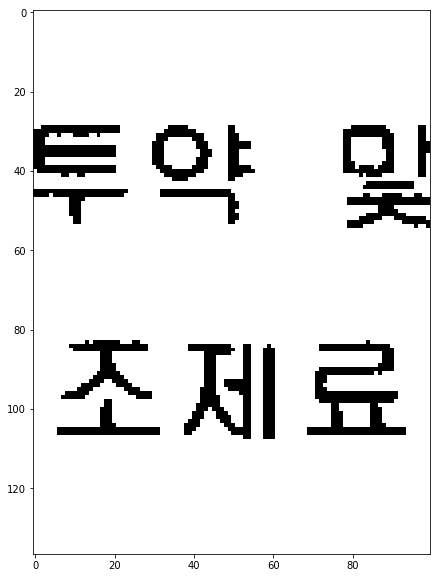

In [408]:
plt.figure(figsize=(10, 10))
plt.imshow(subimg1)

In [423]:
subimg1_pil = cv2.cvtColor(subimg1, cv2.COLOR_BGR2RGB)
subimg1_pil = Image.fromarray(subimg1_pil)
coord = image_to_data(subimg1_pil, lang = 'kor', config=custom_oem_psm_config, output_type = Output.DICT)
n_box = len(coord['level'])

In [489]:
subimg2_pil = cv2.cvtColor(subimg2, cv2.COLOR_BGR2RGB)
subimg2_pil = Image.fromarray(subimg2_pil)
coord = image_to_data(subimg2_pil, lang = 'kor', config=custom_oem_psm_config, output_type = Output.DICT)
n_box = len(coord['level'])

In [425]:
for i in range(n_box):
    if coord['text'][i] != "":
#        if coord['width'][i] <= 200:
#            if coord['height'][i] <= 50:
                (x, y, w, h) = (coord['left'][i], coord['top'][i], coord['width'][i], coord['height'][i])
                cv2.rectangle(subimg1, (x, y), (x + w, y + h), (255, 0, 0), 1)

In [502]:
custom_oem_psm_config = r'--oem 3 --psm 7'
print(image_to_boxes(subimg2_pil, lang = 'kor', config=custom_oem_psm_config, output_type = Output.DICT))

{'char': ['투', '약', '및'], 'left': [0, 30, 77], 'bottom': [1, 0, 0], 'right': [24, 100, 100], 'top': [26, 26, 29], 'page': [0, 0, 0]}


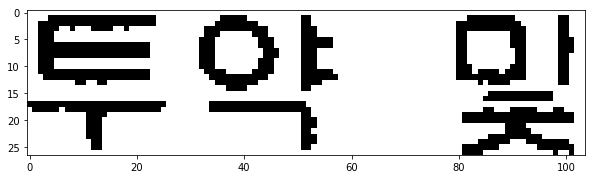

In [503]:
plt.figure(figsize=(10, 10))
plt.imshow(subimg2)